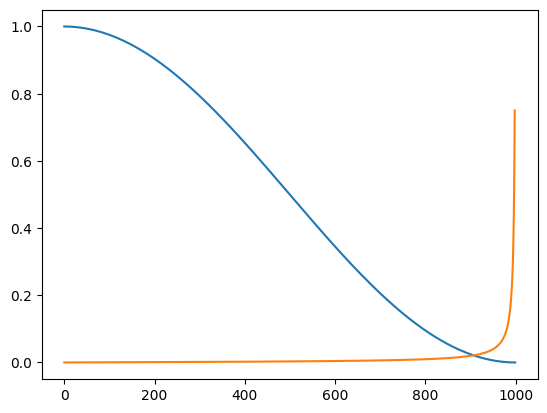

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import sys
sys.path.append('..')

import diffusion as df

alphas_cumprod, betas, alphas = df.calculate_variance(1000)

plt.plot(alphas_cumprod)
plt.plot(betas)
plt.show()

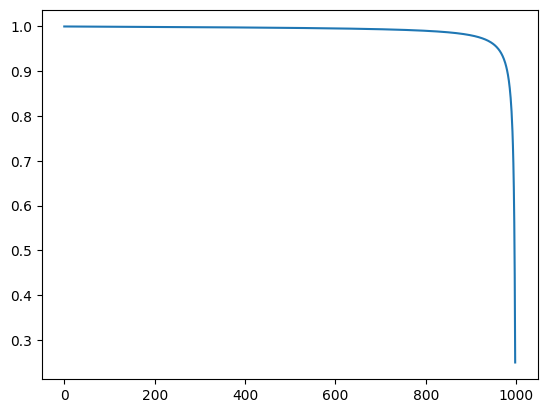

In [2]:
# plot alphas
plt.plot(alphas)

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

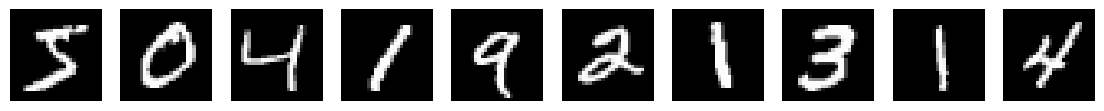

In [4]:
fig, ax = plt.subplots(1, 10, figsize=(14, 3))

batch = x_train[:10]

for i, img in enumerate(batch):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')

(20, 28, 28) (20,) (20, 28, 28) (20, 28, 28)


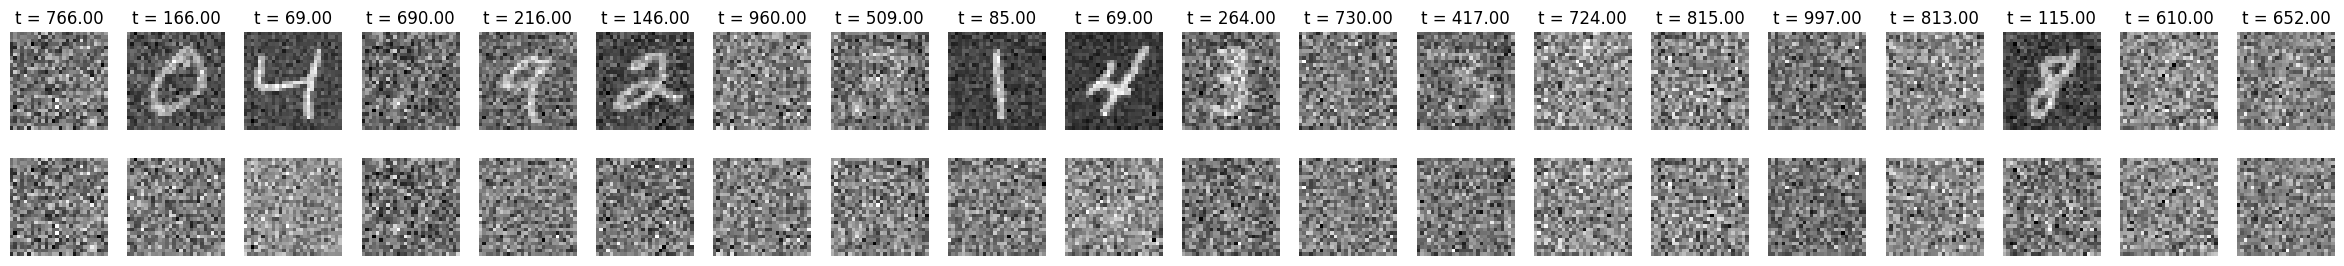

In [5]:
batch = x_train[:20]

b, noise = df.add_gauss_noise_to_image(batch, alphas_cumprod, 1000) # type: ignore
noisy_imgs = b['X_Noisy']
t = b['t_Input']
print(noisy_imgs.shape, t.shape, noise.shape, batch.shape)
fig, ax = plt.subplots(2, batch.shape[0], figsize=(batch.shape[0]*1.5, 3))

for i in range(batch.shape[0]):
    ax[0, i].imshow(noisy_imgs[i], cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title(f't = {t[i]:.2f}')
    ax[1, i].imshow(noise[i], cmap='gray')
    ax[1, i].axis('off')

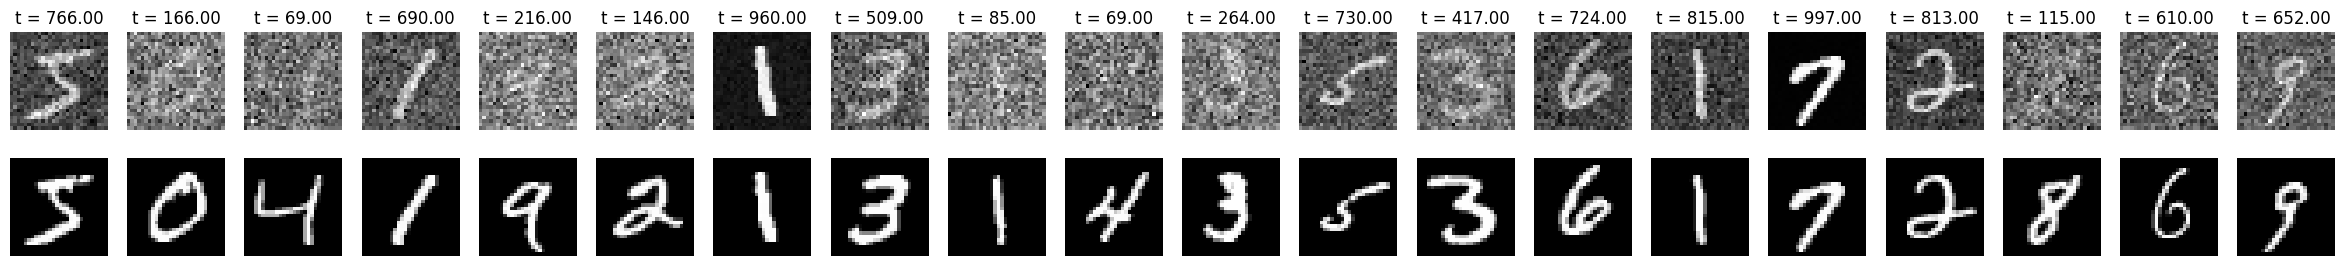

In [6]:
fig, ax = plt.subplots(2, batch.shape[0], figsize=(batch.shape[0]*1.5, 3))

for i in range(batch.shape[0]):
    ax[0, i].imshow(noisy_imgs[i]-noise[i], cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title(f't = {t[i]:.2f}')
    ax[1, i].imshow(batch[i], cmap='gray')
    ax[1, i].axis('off')

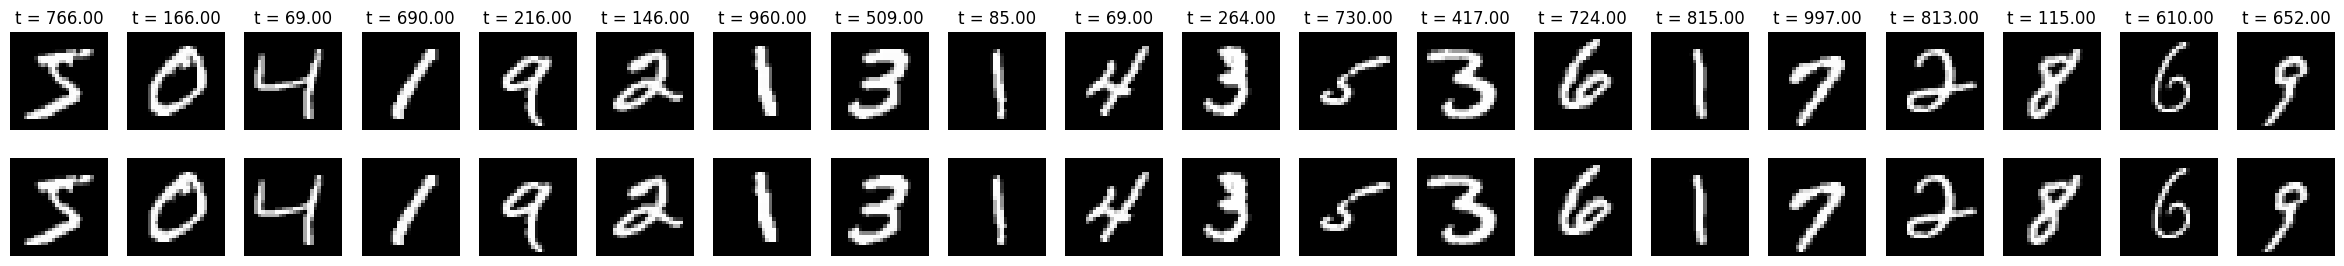

In [7]:
fig, ax = plt.subplots(2, batch.shape[0], figsize=(batch.shape[0]*1.5, 3))
clean = df.sub_gauss_noise_from_image(noisy_imgs, alphas_cumprod, t, noise)

for i in range(batch.shape[0]):
    ax[0, i].imshow(clean[i], cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title(f't = {t[i]:.2f}')
    ax[1, i].imshow(batch[i], cmap='gray')
    ax[1, i].axis('off')

(1, 1000, 128)


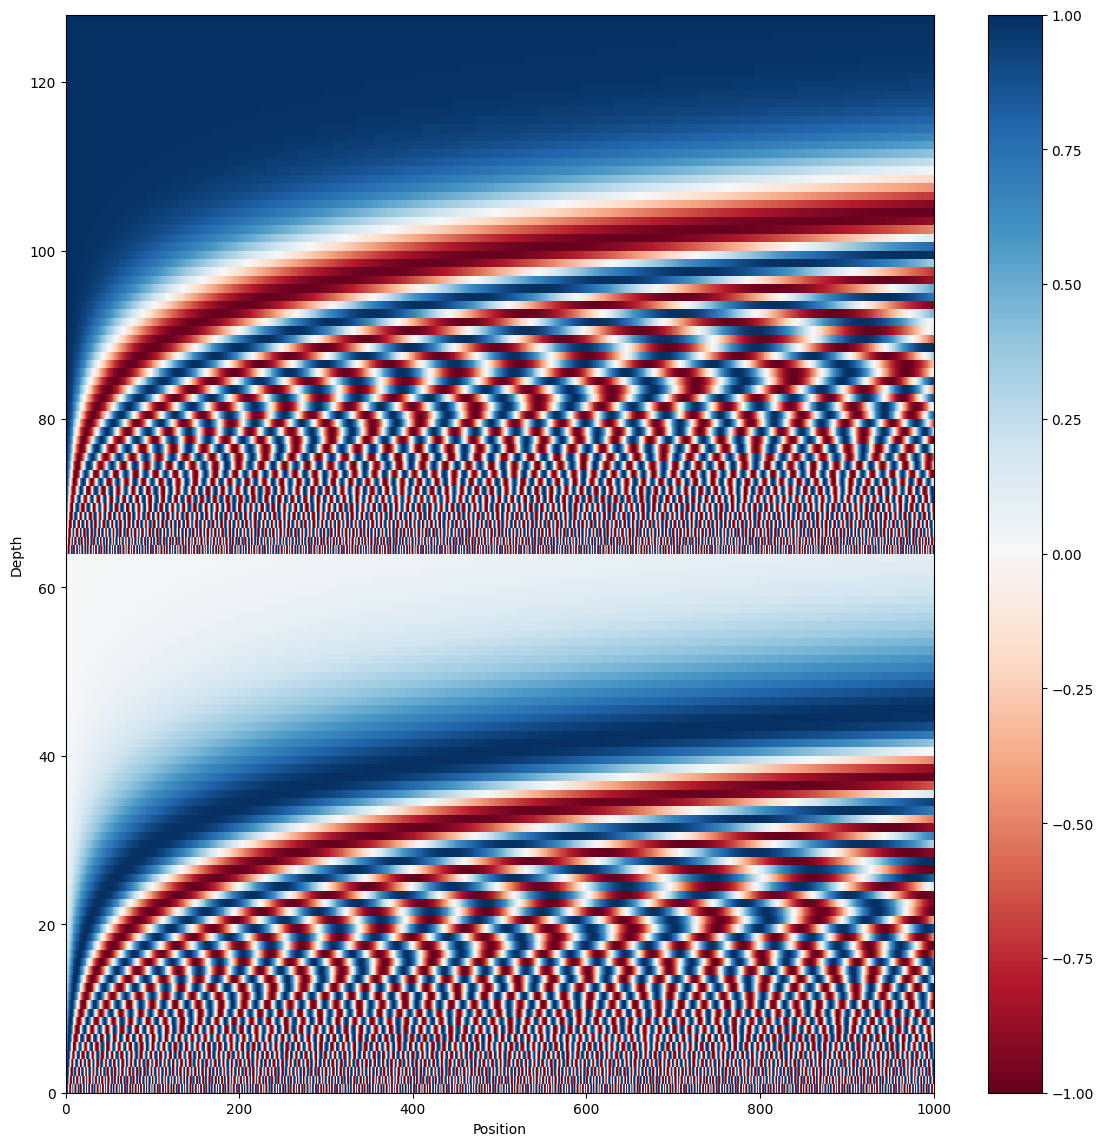

In [8]:
n, d = 1000, 128
pos_encoding = df.positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

# Juggle the dimensions for the plot
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

# size
plt.figure(figsize=(14, 14))
plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

In [10]:
# load model
PATH = '../models/'
model = tf.keras.models.load_model(PATH + 'model88.h5')

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t_Input (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.compat.v1.gather (TFOpLambd  (None, 128)         0           ['t_Input[0][0]']                
 a)                                                                                               
                                                                                                  
 X_Noisy (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           2064        ['tf.compat.v1.gather[0][0]'] 

In [13]:
noise = np.random.normal(0, 1, (1, 28, 28, 1))
t = 1000
# predict
pred = model.predict({
    'X_Noisy': noise,
    't_Input': np.array([t])
})

plt.imshow(pred[0, :, :, 0], cmap='gray')

KeyboardInterrupt: 